In [31]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

## The Extraordinary Power of Explanatory Power

The strength of multiple linear regression lies in its ability to provide straightforward and interpretable solutions that not only predict future outcomes, but also provide insight into the underlying processes that create these outcomes. For example, after fitting the following model:

HourlyWidgetProduction=α+β1WorkerAgeFrom18+β2WorkerYearsinJob+β3IsRoundWidget
HourlyWidgetProduction=α+β1WorkerAgeFrom18+β2WorkerYearsinJob+β3IsRoundWidget

we get these parameters:
α=2
α=2
β1=.1
β1=.1
β2=.2
β2=.2
β3=4
β3=4

Using those parameters, we learn that round widgets are twice as fast to produce as non-round widgets. We can tell because αα represents the intercept, the hourly rate of production for widgets that are not round (2 an hour) and β3β3 represents the difference between the intercept and the hourly rate of production for round widgets (also 2 an hour, for a total of 4 round widgets an hour).

We also learn that for every year a worker ages after the age of 18, their hourly production-rate goes up by .1 (β2β2). In addition, for every year a worker has been in that job, their hourly production-rate goes up by .2 (β3β3).

Furthermore, using this model, we can predict that a 20-year-old worker who has been in the job for a year and is making only round widgets will make 2+.1∗2+.2∗1+4=6.32+.1∗2+.2∗1+4=6.3 round widgets an hour.

Finally, and probably of greatest interest, we get an R-Squared value. This is a proportion (between 0 and 1) that expresses how much variance in the outcome variable our model was able to explain. Higher R2R2 values are better to a point-- a low R2R2 indicates that our model isn't explaining much information about the outcome, which means it will not give very good predictions. However, a very high R2R2 is a warning sign for overfitting. No dataset is a perfect representation of reality, so a model that perfectly fits our data (R2R2 of 1 or close to 1) is likely to be biased by quirks in the data, and will perform less well on the test-set.

Here's an example using a toy advertising dataset:


In [32]:
# Acquire, load, and preview the data.
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['sales'].values.reshape(-1, 1)
X = data[['TV','radio','newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


#### Assumption one: linear relationship

### Assumption one: linear relationship

As mentioned earlier, features in a regression need to have a linear relationship with the outcome. If the relationship is non-linear, the regression model will try to find any hint of a linear relationship, and only explain that – with predictable consequences for the validity of the model.

Sometimes this can be fixed by applying a non-linear transformation function to a feature. For example, if the relationship between feature and outcome is quadratic and all feature scores are > 0, we can take the square root of the features, resulting in a linear relationship between the outcome and sqrt(feature). 

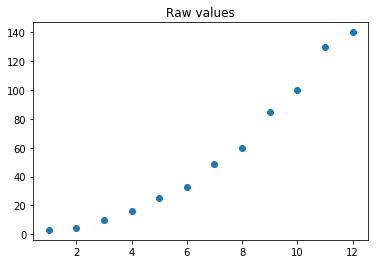

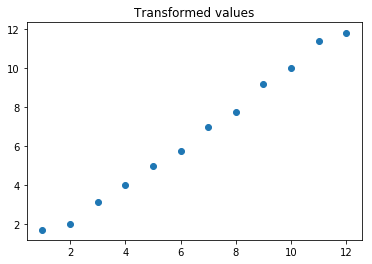

In [33]:
# Sample data.
outcome = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
feature = [3, 4, 10, 16, 25, 33, 49, 60, 85, 100, 130, 140]

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in  feature]


# Well now isn't that nice.
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

#### Assumption two: multivariate normality

### Assumption two: multivariate normality

The error from the model (calculated by subtracting the model-predicted values from the real outcome values) should be normally distributed. Since ordinary least squares regression models are fitted by choosing the parameters that best minimize error, skewness or outliers in the error can result in serious miss-estimations.

Outliers or skewness in error can often be traced back to outliers or skewness in da

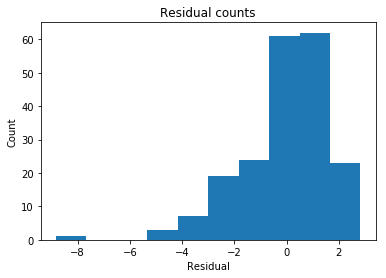

In [34]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

### Assumption three: homoscedasticity
The distribution of your error terms (its "scedasticity"), should be consistent for all predicted values, or **homoscedastic**.

For example, if your error terms aren't consistently distributed and you have more variance in the error for large outcome values than for small ones, then the confidence interval for large predicted values will be too small because it will be based on the average error variance.  This leads to overconfidence in the accuracy of your model's predictions.

Some fixes to heteroscedasticity include transforming the dependent variable and adding features that target the poorly-estimated areas. For example, if a model tracks data over time and model error variance jumps in the September to November period, a binary feature indicating season may be enough to resolve the problem.

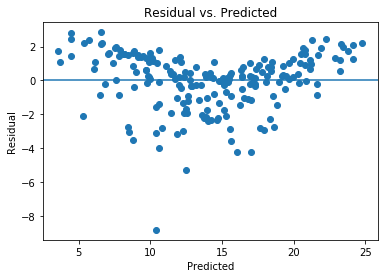

In [35]:
### Assumption three: homoscedasticity

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

### Assumption four: low multicollinearity

In [36]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,radio,newspaper
TV,1.000,0.055,0.057
radio,0.055,1.000,0.354
newspaper,0.057,0.354,1.000


## Drill: fixing assumptions

Judging from the diagnostic plots, your data has a problem with both heteroscedasticity and multivariate non-normality. Use the cell(s) below to see what you can do to fix it.


In [37]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000,200.000,200.000,200.000,200.000
mean,100.500,147.042,23.264,30.554,14.023
std,57.879,85.854,14.847,21.779,5.217
min,1.000,0.700,0.000,0.300,1.600
25%,50.750,74.375,9.975,12.750,10.375
50%,100.500,149.750,22.900,25.750,12.900
75%,150.250,218.825,36.525,45.100,17.400
max,200.000,296.400,49.600,114.000,27.000


In [38]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

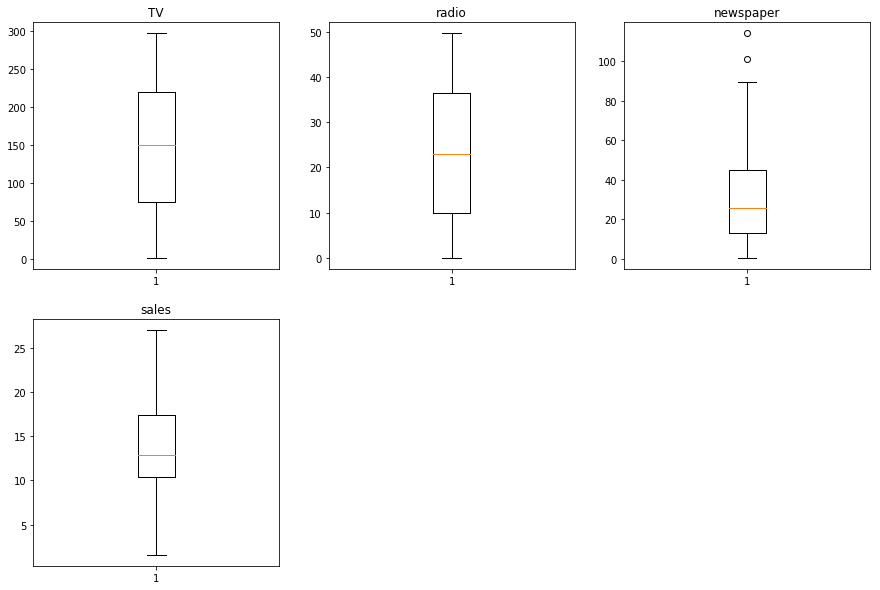

In [39]:
#3 check outlier
checkoutlier=['TV','radio','newspaper','sales'] 
counter=1
plt.figure(figsize=(15, 10))
for i in checkoutlier:
    plt.subplot(2,3,counter)
    plt.boxplot(data[i])
    plt.title(i)
    counter+=1
plt.show()

In [43]:
# clear newspaper
data['newspaper']  = data[data['newspaper']<95]

In [45]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000,200.000,200.000,93.000,200.000
mean,100.500,147.042,23.264,47.828,14.023
std,57.879,85.854,14.847,27.240,5.217
min,1.000,0.700,0.000,1.000,1.600
25%,50.750,74.375,9.975,25.000,10.375
50%,100.500,149.750,22.900,48.000,12.900
75%,150.250,218.825,36.525,71.000,17.400
max,200.000,296.400,49.600,94.000,27.000


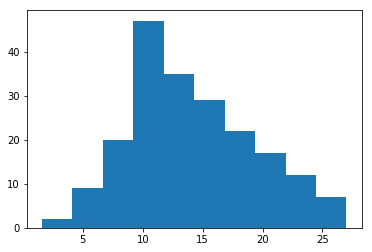

In [50]:
# Check Sales distribution
plt.hist(data['sales'])
plt.show()

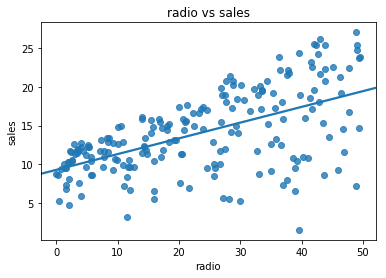

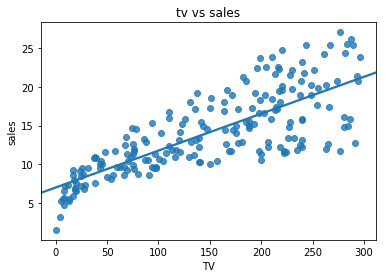

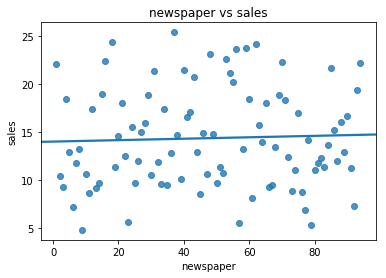

In [52]:
# Check whether linear relationship

sns.regplot(data['radio'], data['sales'], ci = False)
plt.title('radio vs sales')
plt.show()


sns.regplot(data['TV'], data['sales'], ci = False)
plt.title('tv vs sales')
plt.show()


sns.regplot(data['newspaper'], data['sales'], ci = False)
plt.title('newspaper vs sales')
plt.show()

## No relationship among newspapaer , tv and sales

In [55]:
# square sales
data['sales_sqrt'] = np.sqrt(data['sales'])

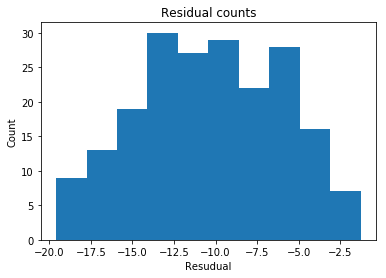

In [56]:
# Check residual whether normalize
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['sales_sqrt']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Resudual')
plt.ylabel('Count')
plt.show()

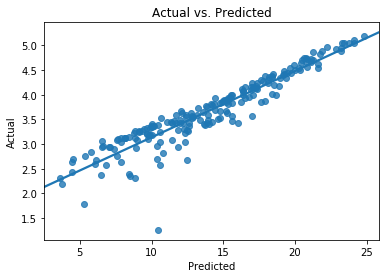

In [57]:
# Plot relationship
sns.regplot(predicted, actual, ci = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.axhline(y=0)
plt.title('Actual vs. Predicted')
plt.show()

In [61]:
data = data.dropna()
target = data['sales_sqrt'].values.reshape(-1, 1)
feature = data[['TV','radio','newspaper']]
regr.fit(feature, target)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(feature, target))




Coefficients: 
 [[ 0.00626078  0.02300256  0.00160547]]

Intercept: 
 [ 2.17015518]

R-squared:
0.906291200598


### Sales = 2.17015518 * 0.0626078TV + 0.02300256*radio + 0.00160547 * newspaper